In [1]:
import json
import os
import importlib
from IPython.display import display
import numpy as np
np.set_printoptions(threshold=20)

In [2]:
import cmdbench

In [3]:
benchmark_results = cmdbench.benchmark_command("node --expose-gc test.js", iterations_num = 10, raw_data = False)

In [4]:
# Get the benchmark results for the first iteration
benchmark_results.get_single_iteration()

{
  'cpu': {
    'system_time': 2.35,
    'total_time': 43.13,
    'user_time': 40.78,
  },
  'disk': {
    'read_bytes': 0,
    'read_chars': 1425432,
    'total_bytes': 1310720,
    'total_chars': 2737071,
    'write_bytes': 1310720,
    'write_chars': 1311639,
  },
  'memory': {
    'max': 7081500672,
    'max_perprocess': 788422656,
  },
  'process': {
    'execution_time': 8.646,
    'stderr_data': '',
    'stdout_data': 'Running master process\n\nRunning child process
                    #3\n\nRunning child process #1\n\nRunning child process
                    ...(4 hidden lines)',
  },
  'time_series': {
    'cpu_percentages': array([  0. , 138.5, 170.2, ..., 181.9,   0. ,   0. ])
    'memory_bytes': array([ 19464192,  19816448,  21049344, ..., 138555392,  69103616,
        29683712])
    'sample_milliseconds': array([   1,    8,   14, ..., 8626, 8631, 8638])
  },
}

In [5]:
# Get the benchmark results for the average of all kinds of resources, including time series data
benchmark_results.get_averages()

{
  'cpu': {
    'system_time': 2.5840000000000005,
    'total_time': 47.080999999999996,
    'user_time': 44.497,
  },
  'disk': {
    'read_bytes': 0.0,
    'read_chars': 1425417.6,
    'total_bytes': 1310720.0,
    'total_chars': 2737042.2,
    'write_bytes': 1310720.0,
    'write_chars': 1311624.6,
  },
  'memory': {
    'max': 7133421158.4,
    'max_perprocess': 789089484.8,
  },
  'process': {
    'execution_time': 9.413,
    'stderr_data': None,
    'stdout_data': None,
  },
  'time_series': {
    'cpu_percentages': array([ 31.36875   , 100.39090909,  72.87142857, ..., 158.4       ,
         0.        ,   0.        ])
    'memory_bytes': array([1.95676160e+07, 2.04274967e+07, 2.09238309e+07, ...,
       1.39403264e+08, 6.91732480e+07, 6.71416320e+07])
    'sample_milliseconds': array([2.87500000e+00, 1.17272727e+01, 2.01428571e+01, ...,
       1.04590000e+04, 1.04650000e+04, 1.04730000e+04])
  },
}

In [6]:
# Get statistics for all of the resources over iterations
benchmark_results.get_statistics()

{
  'cpu': {
    'system_time': (mean: 2.5840000000000005, stdev: 0.20800000000000002, min: 2.31, max: 2.92)
    'total_time': (mean: 47.080999999999996, stdev: 3.451308302658573, min: 42.94, max: 51.96)
    'user_time': (mean: 44.497, stdev: 3.2577723984342426, min: 40.48, max: 49.08)
  },
  'disk': {
    'read_bytes': (mean: 0.0, stdev: 0.0, min: 0, max: 0)
    'read_chars': (mean: 1425417.6, stdev: 15.094369811290566, min: 1425400, max: 1425448)
    'total_bytes': (mean: 1310720.0, stdev: 0.0, min: 1310720, max: 1310720)
    'total_chars': (mean: 2737042.2, stdev: 30.18873962258113, min: 2737007, max: 2737103)
    'write_bytes': (mean: 1310720.0, stdev: 0.0, min: 1310720, max: 1310720)
    'write_chars': (mean: 1311624.6, stdev: 15.094369811290566, min: 1311607, max: 1311655)
  },
  'memory': {
    'max': (mean: 7133421158.4, stdev: 18784942.05853999, min: 7081500672, max: 7147241472)
    'max_perprocess': (mean: 789089484.8, stdev: 903791.1015216735, min: 788209664, max: 791203840)

In [7]:
# Get the plot for resources (Ram + CPU)
fig = benchmark_results.get_resources_plot(width = 15, height = 3)

In [8]:
# Delete figure file if it already exists and save the new one
figure_image_save_path = "resources/benchmark.png"
if os.path.exists(figure_image_save_path):
    os.remove(figure_image_save_path)
fig.savefig(figure_image_save_path)

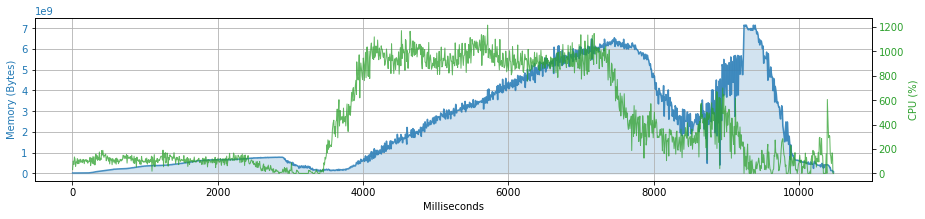

In [9]:
%matplotlib inline
# Show the plot in ipython
display(fig)

Cpu usage of 1500% means 1500 / 100 = 15 cores are being fully utilized

In [10]:
print("Average runtime: %s seconds" % benchmark_results.get_averages().process.execution_time)

Average runtime: 9.413 seconds


In [11]:
# Get lists for accurate values of different kinds of resources over iterations
benchmark_results.get_values_per_attribute()

{
  'cpu': {
    'system_time': [2.35, 2.4600000000000004, 2.47, 2.45, 2.31, 2.52, 2.7, 2.8800000000000003, 2.7800000000000002, 2.92],
    'total_time': [43.13, 42.94, 44.22, 45.63, 43.900000000000006, 46.59, 51.040000000000006, 51.96, 50.57, 50.83],
    'user_time': [40.78, 40.48, 41.75, 43.18, 41.59, 44.07, 48.34, 49.08, 47.79, 47.91],
  },
  'disk': {
    'read_bytes': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'read_chars': [1425432, 1425400, 1425416, 1425448, 1425432, 1425416, 1425416, 1425400, 1425416, 1425400],
    'total_bytes': [1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720],
    'total_chars': [2737071, 2737007, 2737039, 2737103, 2737071, 2737039, 2737039, 2737007, 2737039, 2737007],
    'write_bytes': [1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720, 1310720],
    'write_chars': [1311639, 1311607, 1311623, 1311655, 1311639, 1311623, 1311623, 1311607, 1311623, 1311607],
  },
  'memory': {
    'max': [70815006